# **Electric Vehicle Distribution & Infrastructure Optimization**

Group - 3

Team Members: Fangzhou Zheng, Haojiang Wu, Yixi Yu, Pranaya Bindu Buyya

##**Introduction**

## **Problem Statement**

The rapid growth of electric vehicle (EV) penetration is both a challenge and a chance, predominantly in charging infrastructure planning, spatial differences in geographical adoption, and policy effectiveness. With EV sales growing by 35% (IEA, 2023), a deficit in charging facilities is the largest barrier to widescale adoption (McKinsey, 2022). Moreover, existing evidence is often poor in incorporating overall evaluation that brings together vehicle factors, geographical extent, and the impact of policies.

Our objective is to measure EV distribution patterns, identify charging demand hotspots, and assess the impact of policy stimuli. Through machine learning techniques of association rule mining and clustering, we will establish key insights that will optimize the location of charging infrastructure, facilitate policy-making choices, and enhance market strategies. The findings will provide actionable insights for energy retailers, policymakers, and auto-makers, facilitating an efficient and sustainable EV society.

## **Data Source**

**Source:** The dataset is made available for public release by the Washington Open Data Portal, providing up-to-date records of registered electric vehicles within the state.

**Dataset URL:** https://drive.google.com/file/d/1iLFacW1f3ENf4u6t4VgsW6GaeNn99za_/view?usp=drive_link   

**Data Dictionary:**

This dataset provides a comprehensive list of electric vehicles (EVs) registered in Washington State, including vehicle details, geographic location, and policy data. The data is taken from the Washington State Department of Licensing (DOL) and updated from time to time to reflect the latest EV registrations.

Dataset Size: approximately 51.7 MB

Number of Records: 22,392 rows (one for each EV registration)

Number of Attributes: 17 columns



| **Feature Name**               | **Description**                                           | **Data Type**                |
|--------------------------------|-----------------------------------------------------------|------------------------------|
| **VIN (1-10)**                 | First 10 digits of the Vehicle Identification Number      | Categorical                  |
| **County**                     | County where the EV is registered                        | Categorical                  |
| **City**                       | City of EV registration                                  | Categorical                  |
| **State**                      | State abbreviation                                       | Categorical                  |
| **Postal Code**                | ZIP code where the vehicle is registered                 | Categorical (Numeric)        |
| **Model Year**                 | Year the vehicle was manufactured                        | Numeric                      |
| **Make**                       | Vehicle manufacturer                                     | Categorical                  |
| **Model**                      | Specific model of the EV                                 | Categorical                  |
| **Electric Vehicle Type**       | EV classification (Battery or Hybrid)                   | Categorical                  |
| **CAFV Eligibility**           | Eligibility for Clean Alternative Fuel Vehicle incentives | Categorical                  |
| **Electric Range**             | Estimated driving range on a full charge (in miles)     | Numeric                      |
| **Base MSRP**                  | Manufacturer’s Suggested Retail Price                   | Numeric                      |
| **Legislative District**       | Washington legislative district                          | Categorical (Numeric)        |
| **Vehicle Location**           | Geographic coordinates (latitude & longitude)           | Categorical (Converted to Numeric) |
| **Electric Utility**           | Power provider supplying electricity to the EV owner    | Categorical                  |
| **2020 Census Tract**         | Census demographic data reference                       | Categorical (Numeric)        |


In [ ]:
#import data
import pandas as pd
import numpy as np

url = 'https://drive.google.com/uc?export=download&id=1iLFacW1f3ENf4u6t4VgsW6GaeNn99za_'
df = pd.read_csv(url)
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1C4JJXP66P,Kitsap,Poulsbo,WA,98370.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,23.0,258127145,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
1,1G1FX6S08K,Snohomish,Lake Stevens,WA,98258.0,2019,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,44.0,4735426,POINT (-122.06402 48.01497),PUGET SOUND ENERGY INC,5.306105e+10
2,WBY1Z2C58F,King,Seattle,WA,98116.0,2015,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81.0,0.0,34.0,272697666,POINT (-122.41067 47.57894),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1V24F,Yakima,Selah,WA,98942.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,0.0,15.0,258112970,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223995 entries, 0 to 223994
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         223995 non-null  object 
 1   County                                             223992 non-null  object 
 2   City                                               223992 non-null  object 
 3   State                                              223995 non-null  object 
 4   Postal Code                                        223992 non-null  float64
 5   Model Year                                         223995 non-null  int64  
 6   Make                                               223995 non-null  object 
 7   Model                                              223995 non-null  object 
 8   Electric Vehicle Type                              223995 non-null  object

## **Data Cleaning & Preprocessing**

##**Exploratory Data Analysis: Looking into Interesting Insights**

For this project, we are performing Electric Vehicle (EV) adoption in Washington State based on a dataset available.

The primary goal of this EDA is to gain insights into EV distribution, model popularity, infrastructure availability, and policy impact. Through statistical analysis and visualizations, we aim to answer the following primary questions:

In [ ]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract,Longitude,Latitude
count,223496.000000,223496.000000,223496.000000,223496.000000,223496.000000,2.234960e+05,2.234960e+05,223496.000000,223496.000000
mean,98269.193739,2021.265266,47.726599,828.337957,28.876356,2.329479e+08,5.304006e+10,-122.063454,47.458093
std,310.659079,2.989873,84.975652,7366.061719,14.911001,6.884834e+07,1.644383e+07,1.054376,0.619611
min,98001.000000,1999.000000,0.000000,0.000000,1.000000,4.385000e+03,5.300195e+10,-124.627350,45.579230
25%,98052.000000,2020.000000,0.000000,0.000000,17.000000,2.008299e+08,5.303301e+10,-122.401990,47.328000
50%,98126.000000,2022.000000,0.000000,0.000000,32.000000,2.488410e+08,5.303303e+10,-122.291790,47.603260
75%,98375.000000,2023.000000,39.000000,0.000000,42.000000,2.674022e+08,5.305307e+10,-122.131580,47.722380
max,99403.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.307794e+10,-117.043980,48.999760


**a) What is the relative preference for Plug-in Hybrid Electric Vehicles (PHEVs) and Battery Electric Vehicles (BEVs)?**

Text(0.5, 0, 'Count')

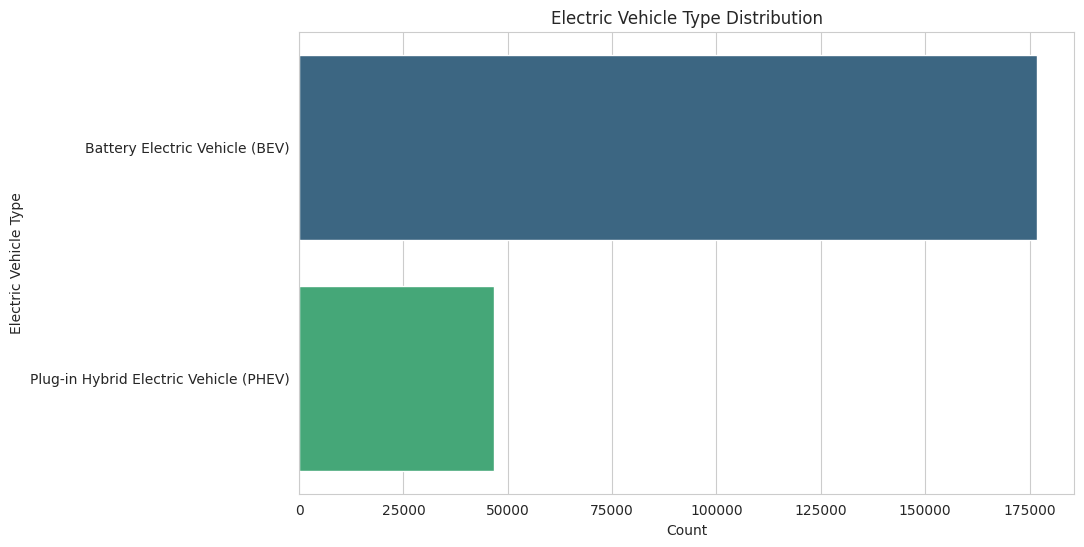

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.countplot(y='Electric Vehicle Type', data=df, palette='viridis', hue = 'Electric Vehicle Type')
plt.title('Electric Vehicle Type Distribution')
plt.xlabel('Count')

**Observations:**

Battery Electric Vehicles (BEVs) make up ~80% of the sample, and Plug-in Hybrid Electric Vehicles (PHEVs) make up a paltry ~20%. This indicates that there is high consumer demand for electric vehicles over hybrids, most likely due to improved charging infrastructure, longer battery lifespan, and government incentives favoring BEVs. While PHEVs have a niche market share, the trend is towards a continued move towards fully electric mobility as technology and infrastructure improve.

**b) Which firms dominate the EV market?**

Text(0.5, 0, 'Count')

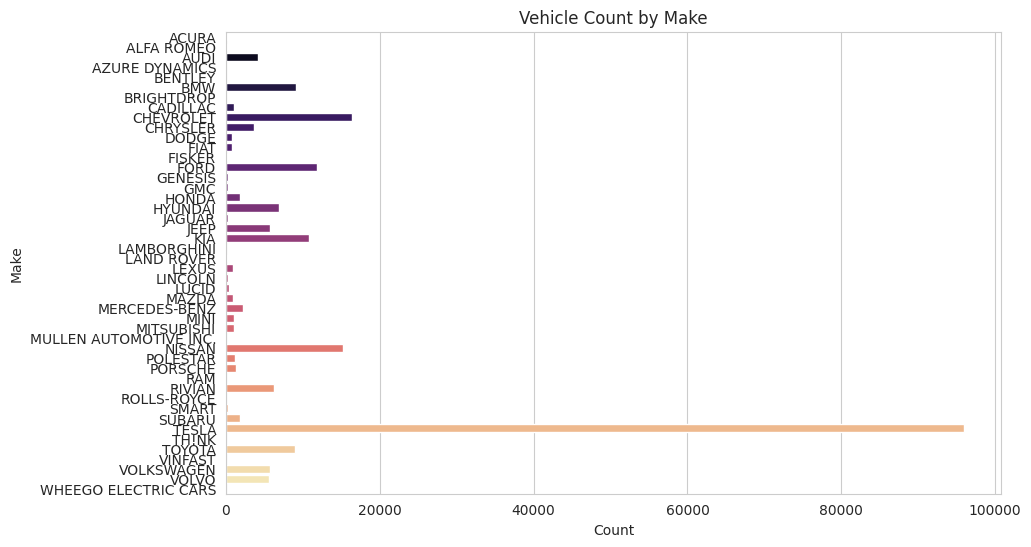

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.countplot(y='Make', data=df, palette='magma', hue = 'Make')
plt.title('Vehicle Count by Make')
plt.xlabel('Count')

**Observations:**

Tesla is the EV leader by a significant margin over the next largest firms, with Chevrolet and Nissan following closely behind as significant players in the affordable EV space. Firms like Ford, Toyota, and Hyundai exist but have a relatively small share of the market. Tesla's leadership might be a result of extensive charging stations, superior brand awareness, and superior battery technology, whereas Chevrolet and Nissan exist as evidence of sustained demand for affordable EVs.


**c) How has the adoption of EV evolved over the years?**

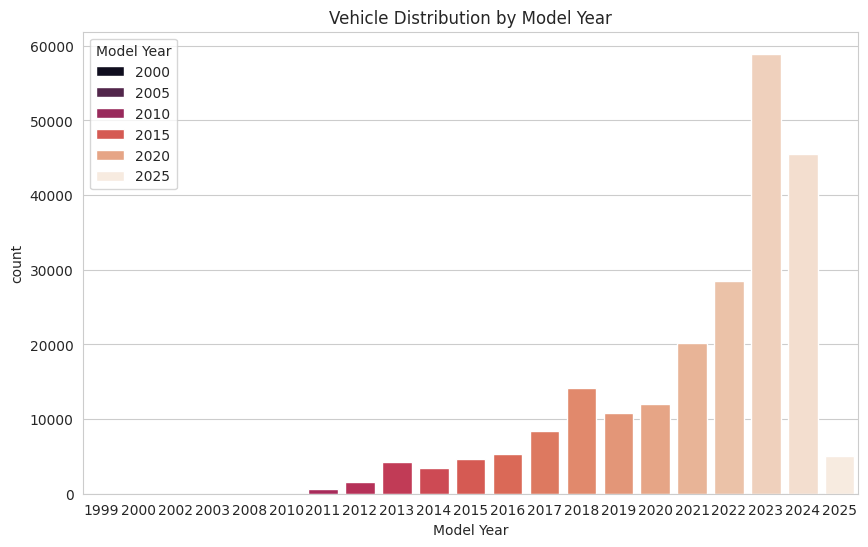

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.countplot(x='Model Year', data=df, palette='rocket', hue = 'Model Year')
plt.title('Vehicle Distribution by Model Year')
plt.show()

**Observations:**

The majority of the registered EVs are made after 2018, with 2022 and 2023 representing the peak. EVs made before 2010 are rare, indicating that early uptake was unpopular and started picking up pace only in the last decade. The sharp spike in registrations over recent years is a reflection of the increase in battery technology, decreased affordability, and heightened policy support that have been fueling the relatively faster growth of the EV market.

**d) Where is EV adoption geographically concentrated?**

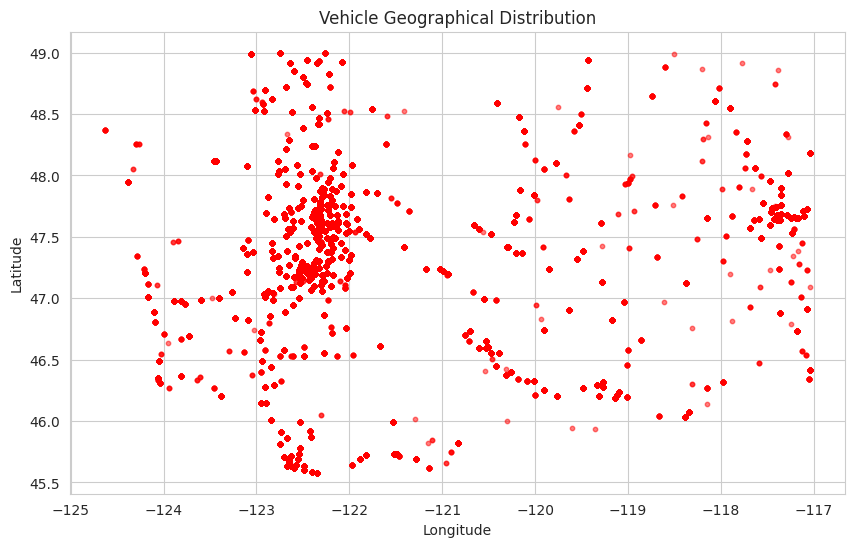

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df["Longitude"], df["Latitude"], alpha=0.5, c='red', s=10)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Vehicle Geographical Distribution")
plt.grid(True)
plt.show()

**Observations:**

EV adoption is most dense in urban centers, with Seattle, Bellevue, and Tacoma. Rural regions, particularly eastern Washington, are low in adoption, likely due to infrequent charging infrastructure and reduced EV incentives. The most dense EV adoption tracks along the I-5 corridor correspond to population density and infrastructure availability, and the outlying regions are underserved.

**e) How do government incentives like CAFV eligibility impact adoption?**

<ipython-input-150-f8b18fc486b8>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cafv_counts.index, y=cafv_counts.values, palette="coolwarm", order=cafv_counts.index)


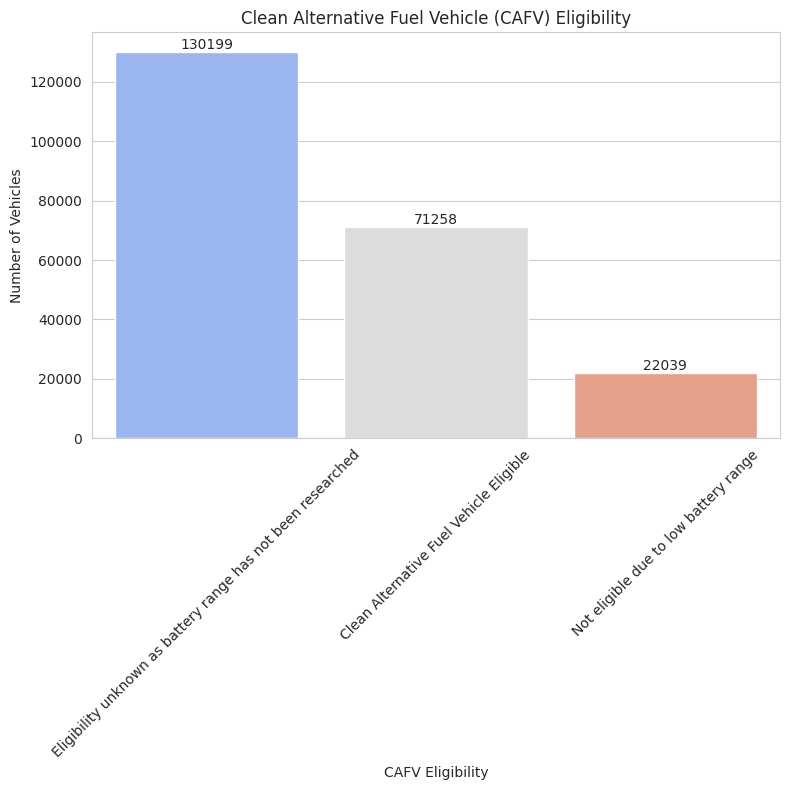

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cafv_counts = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

plt.figure(figsize=(8, 8))
sns.set_style("whitegrid")

sns.barplot(x=cafv_counts.index, y=cafv_counts.values, palette="coolwarm", order=cafv_counts.index)

plt.title('Clean Alternative Fuel Vehicle (CAFV) Eligibility')
plt.xlabel('CAFV Eligibility')
plt.ylabel('Number of Vehicles')

for i, count in enumerate(cafv_counts.values):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observations:**

Most EVs (130,199) are CAFV-eligible, with 71,258 excluded. This suggests government incentives as a significant factor in EV adoption since most vehicles qualify for state programs offering cash incentives. The high proportion of CAFV-eligible cars indicates the success of policy-driven adoption efforts, though the proportion excluded warns of possible limits in accessibility of incentives.

In [ ]:
df.isnull().sum()

,0
VIN (1-10),0
County,3
City,3
State,0
Postal Code,3
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().count()

,0
VIN (1-10),223496
County,223496
City,223496
State,223496
Postal Code,223496
Model Year,223496
Make,223496
Model,223496
Electric Vehicle Type,223496
Clean Alternative Fuel Vehicle (CAFV) Eligibility,223496


In [ ]:
df[['Longitude', 'Latitude']] = df['Vehicle Location'].str.extract(r'POINT \((-?\d+\.\d+) (-?\d+\.\d+)\)')
df['Longitude'] = df['Longitude'].astype(float)
df['Latitude'] = df['Latitude'].astype(float)
df.drop(columns=['Vehicle Location'], inplace=True)

df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Longitude,Latitude
0,1C4JJXP66P,Kitsap,Poulsbo,WA,98370.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,23.0,258127145,PUGET SOUND ENERGY INC,5.303509e+10,-122.64681,47.73689
1,1G1FX6S08K,Snohomish,Lake Stevens,WA,98258.0,2019,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,44.0,4735426,PUGET SOUND ENERGY INC,5.306105e+10,-122.06402,48.01497
2,WBY1Z2C58F,King,Seattle,WA,98116.0,2015,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81.0,0.0,34.0,272697666,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,-122.41067,47.57894
3,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,477309682,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,-122.23825,47.49461
4,5YJSA1V24F,Yakima,Selah,WA,98942.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,0.0,15.0,258112970,PACIFICORP,5.307700e+10,-120.53145,46.65405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223990,7SAYGDEE4R,Pierce,Puyallup,WA,98374.0,2024,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,2.0,264662359,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10,-122.27575,47.13959
223991,WBY8P2C00M,Snohomish,Lake Stevens,WA,98258.0,2021,BMW,I3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,44.0,157728168,PUGET SOUND ENERGY INC,5.306105e+10,-122.06402,48.01497
223992,JN1AZ0CP3B,Pierce,University Place,WA,98466.0,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73.0,0.0,28.0,261733433,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10,-122.53756,47.23165
223993,5YJ3E1EA2R,Pierce,Puyallup,WA,98374.0,2024,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,25.0,275283487,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10,-122.27575,47.13959


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223496 entries, 0 to 223994
Data columns (total 18 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         223496 non-null  object 
 1   County                                             223496 non-null  object 
 2   City                                               223496 non-null  object 
 3   State                                              223496 non-null  object 
 4   Postal Code                                        223496 non-null  float64
 5   Model Year                                         223496 non-null  int64  
 6   Make                                               223496 non-null  object 
 7   Model                                              223496 non-null  object 
 8   Electric Vehicle Type                              223496 non-null  object 
 9 

In [ ]:
df[df.select_dtypes(include=['object']).columns] = df.select_dtypes(include=['object']).apply(lambda x: x.astype('category'))